In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fsize", "fConc", "fConc1", "fAsym", "fM3Lomg", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(r"C:\Users\gchau\OneDrive\Documents\Python_Exercises\Machine Learning for Everybody\magic04.data", names = cols)
df.head()


,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Lomg,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df.describe()


,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Lomg,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Lomg   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [6]:
df["class"]=df["class"].map({'g':1,'h':0})

In [7]:
df.head(10)

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Lomg,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,1
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


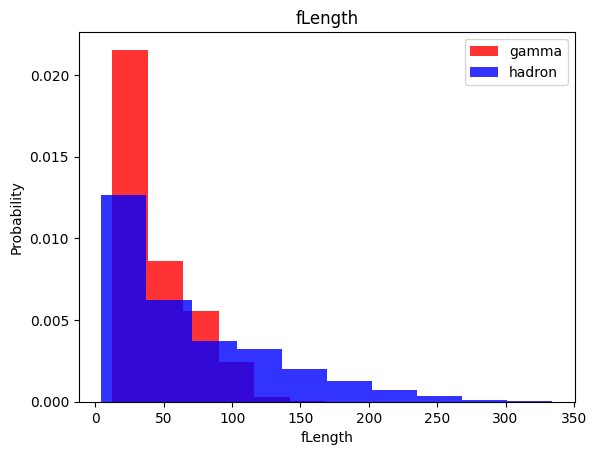

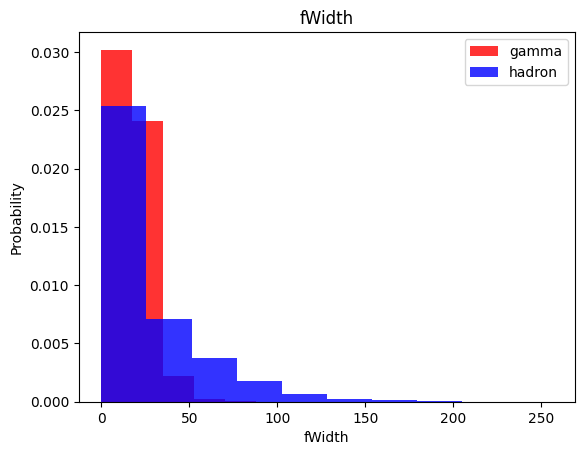

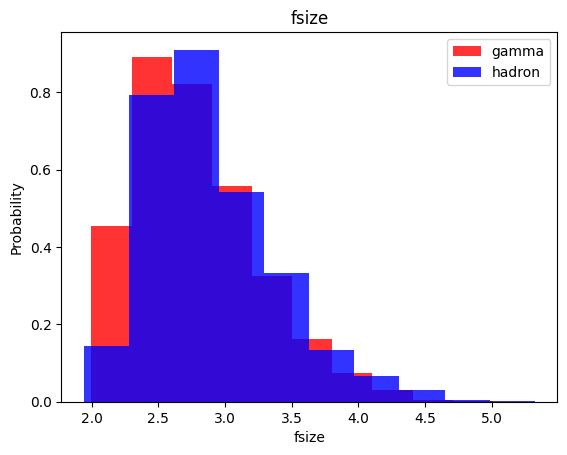

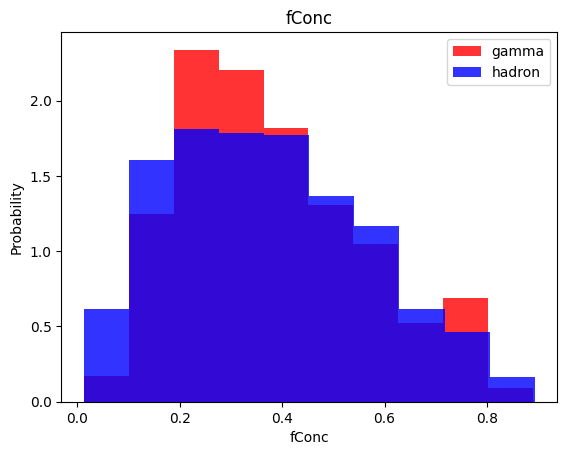

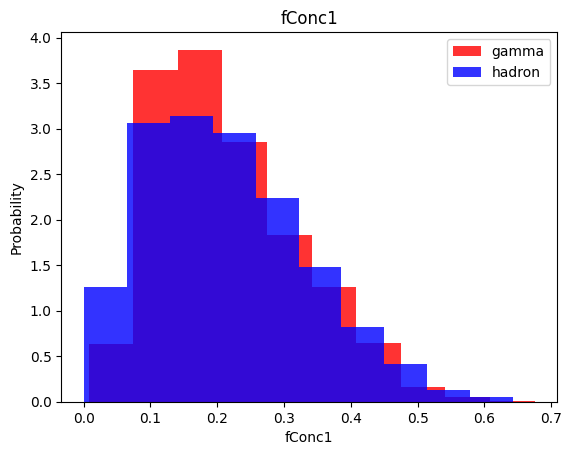

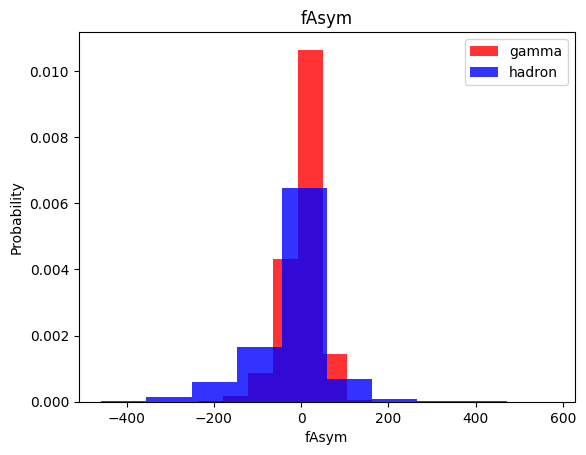

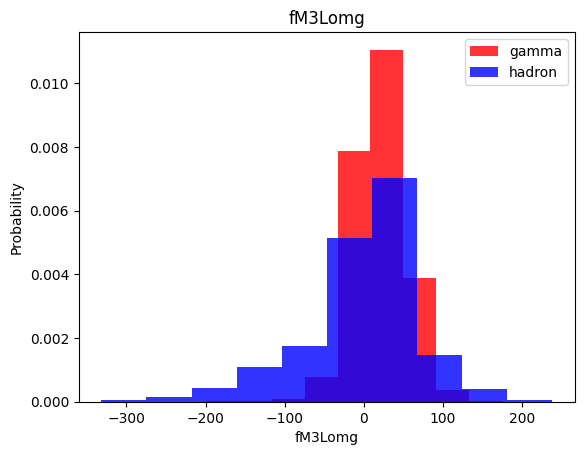

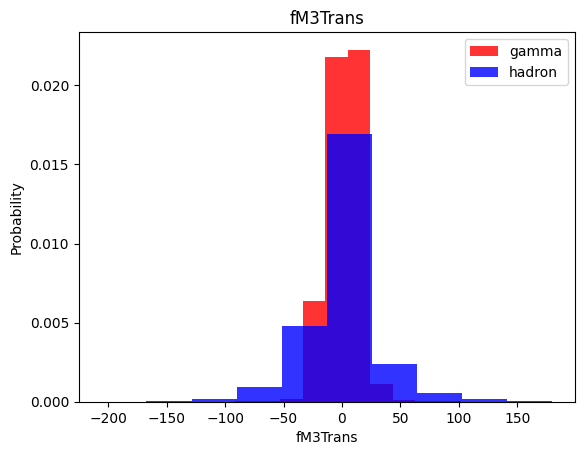

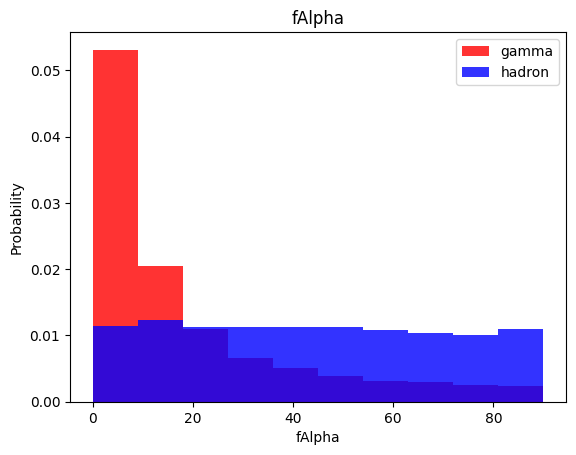

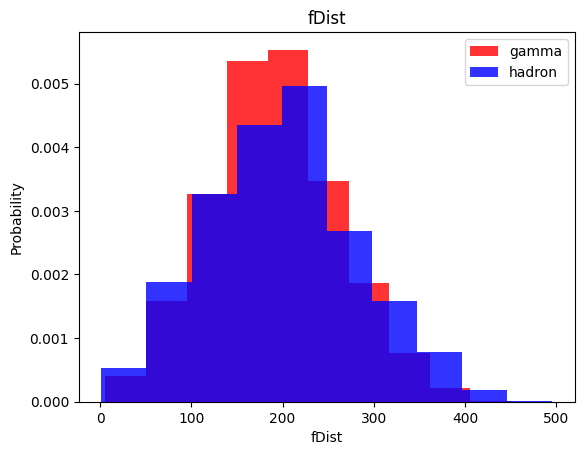

In [8]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='red', label='gamma', alpha=0.8, density=True)
    plt.hist(df[df["class"] == 0][label], color='blue', label='hadron', alpha=0.8, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

Train, Vadilation, Test Datasets

In [10]:
train,validate,test= np.split(df.sample(frac=1, random_state=42),[int(0.6*len(df)), int(0.8*len(df))])

C:\Users\gchau\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)
    
    data = np.hstack((X, np.reshape(Y, (-1,1))))
    
    return data, X, Y

In [12]:
train

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Lomg,fM3Trans,fAlpha,fDist,class
18749,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,0
7051,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
10901,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
15858,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,0
17968,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,0
...,...,...,...,...,...,...,...,...,...,...,...
87,34.8890,19.6402,2.8429,0.3747,0.2534,29.9825,29.1531,12.4846,8.3760,227.3360,1
7630,20.3329,17.3059,2.6707,0.4098,0.2231,11.3876,-9.3600,12.8626,89.6161,164.0240,1
4163,56.6139,26.1253,3.3259,0.1667,0.0862,0.5887,48.7686,-20.3598,9.8420,203.8090,1
3382,59.4502,18.2507,2.6493,0.3991,0.2119,22.6093,62.4000,9.1050,0.1321,177.6130,1


In [13]:
validate

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Lomg,fM3Trans,fAlpha,fDist,class
403,55.8434,21.4546,3.2007,0.2123,0.1169,-27.2250,-27.5871,9.9968,5.4306,233.5880,1
4911,45.2067,16.8321,2.7868,0.3382,0.2018,47.7894,43.4701,14.5961,17.7650,236.3870,1
9365,12.7102,11.6825,2.0314,0.7163,0.3767,15.4677,-7.5235,11.0733,58.6479,119.8390,1
15655,14.7612,5.2058,2.2863,0.7015,0.3971,18.3583,12.1880,5.5089,36.9932,192.3718,0
6378,24.2378,11.0764,2.4370,0.5484,0.3711,-10.7092,-22.2389,-7.2923,5.6286,177.4150,1
...,...,...,...,...,...,...,...,...,...,...,...
16991,85.7372,18.5762,3.0839,0.2708,0.1634,-118.9337,39.1840,13.9181,20.6114,286.3504,0
8751,24.5047,15.9642,2.5971,0.5032,0.3224,15.2523,19.2560,9.5990,14.3432,66.2908,1
2994,61.1222,30.6370,2.9928,0.1891,0.0961,5.9256,43.3545,23.8303,14.3138,208.5940,1
18074,125.0746,54.1217,3.0049,0.2215,0.1210,131.9460,60.3730,-30.8957,17.2241,193.9131,0


In [14]:
test

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Lomg,fM3Trans,fAlpha,fDist,class
6409,77.6784,25.6998,3.6576,0.2206,0.1149,32.4617,61.8591,-20.2988,1.5920,270.0400,1
17511,52.7420,17.7563,2.9372,0.2167,0.1452,26.9544,14.2482,10.8898,73.7897,220.2512,0
16801,32.5462,11.5827,2.3170,0.4434,0.2289,-30.5042,-18.9542,5.5154,86.7709,202.7960,0
2642,90.2333,38.7029,3.8238,0.1767,0.0889,-27.7794,51.0350,30.3730,2.1630,370.4090,1
9280,12.9091,11.2356,2.2516,0.7339,0.4342,14.6230,-7.7891,-8.7673,0.3707,224.6280,1
...,...,...,...,...,...,...,...,...,...,...,...
11284,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,1
11964,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,1
5390,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,1
860,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,1


In [15]:
print(len(train[train['class'] ==1])) #gamma
print(len(train[train['class'] ==0])) #hadron

7409
4003


In [16]:
train, X_train, Y_train = scale_dataset(train, oversample=True)

In [17]:
len(X_train)

14818

In [18]:
len(Y_train)

14818

In [19]:
len(train)

14818

In [20]:
print(sum(Y_train==1))
print(sum(Y_train==0))

7409
7409


In [21]:
validate, X_validate, Y_validate = scale_dataset(validate, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [22]:
train

array([[-0.11221373, -0.59780952,  0.29688742, ..., -0.03016978,
        -0.36778226,  0.        ],
       [-0.69450782, -1.20515822, -1.23117951, ..., -0.32162817,
         0.57431819,  1.        ],
       [-0.29028958, -0.14194463,  1.10818069, ..., -0.67790332,
         0.04038782,  1.        ],
       ...,
       [-0.62571031, -0.51608791, -0.65597237, ...,  1.15508539,
        -0.34583736,  0.        ],
       [-0.48316005, -0.69599925, -0.69748436, ...,  1.4441857 ,
         0.52052073,  0.        ],
       [ 0.4447899 , -0.57263617,  0.15468225, ...,  2.27679887,
        -0.84325962,  0.        ]])

In [23]:
validate

array([[ 0.04951918, -0.05602928,  0.7627144 , ..., -0.85268982,
         0.50563143,  1.        ],
       [-0.20493814, -0.30509323, -0.10444945, ..., -0.38547526,
         0.5434456 ,  1.        ],
       [-0.98233828, -0.58255773, -1.68709157, ...,  1.16312751,
        -1.03110456,  1.        ],
       ...,
       [ 0.1758017 ,  0.43872567,  0.32714212, ..., -0.51620322,
         0.16796535,  1.        ],
       [ 1.70570816,  1.70409982,  0.35249289, ..., -0.40596401,
        -0.03037193,  0.        ],
       [-0.9757524 , -0.60875457, -1.17127679, ...,  2.06568525,
         0.02573327,  0.        ]])

In [24]:
test

array([[ 0.54343646,  0.17850147,  1.72742338, ..., -0.98294178,
         0.9823453 ,  1.        ],
       [-0.03129793, -0.25323048,  0.21366985, ...,  1.79477658,
         0.32936344,  0.        ],
       [-0.49677093, -0.58876775, -1.08953661, ...,  2.29421241,
         0.10043788,  0.        ],
       ...,
       [-0.78610642, -0.56138062, -0.84074647, ..., -0.55280878,
        -0.01632528,  1.        ],
       [-0.52241414,  0.04617469,  0.2069458 , ...,  2.03213287,
        -2.25449388,  1.        ],
       [-0.07434009, -0.64346594, -0.65373361, ...,  1.25185   ,
        -0.48140278,  0.        ]])

K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred1=knn_model.predict(X_test)

In [29]:
y_pred1

array([1, 0, 1, ..., 1, 1, 0])

In [30]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71      1331
           1       0.84      0.88      0.86      2473

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model=GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [36]:
y_pred2=nb_model.predict(X_test)

In [37]:
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [39]:
print(classification_report(y_pred2, Y_test))

              precision    recall  f1-score   support

           0       0.39      0.66      0.49       790
           1       0.89      0.73      0.80      3014

    accuracy                           0.72      3804
   macro avg       0.64      0.70      0.65      3804
weighted avg       0.79      0.72      0.74      3804



Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logReg_model = LogisticRegression()
logReg_model = logReg_model.fit(X_train, Y_train)

In [43]:
y_pred3 = logReg_model.predict(X_test)

In [44]:
y_pred3

array([1, 0, 0, ..., 1, 0, 0])

In [45]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [46]:
print(classification_report(Y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.83      2473

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector Machines(SVM)

In [48]:
from sklearn.svm import SVC

In [49]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [50]:
y_pred4 = svm_model.predict(X_test)

In [51]:
y_pred4

array([1, 0, 0, ..., 1, 1, 0])

In [52]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [53]:
print(classification_report(Y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1331
           1       0.89      0.89      0.89      2473

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Neural Network

In [55]:
import tensorflow as tf

In [56]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel("Binary Cross Entropy")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [57]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = nn_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

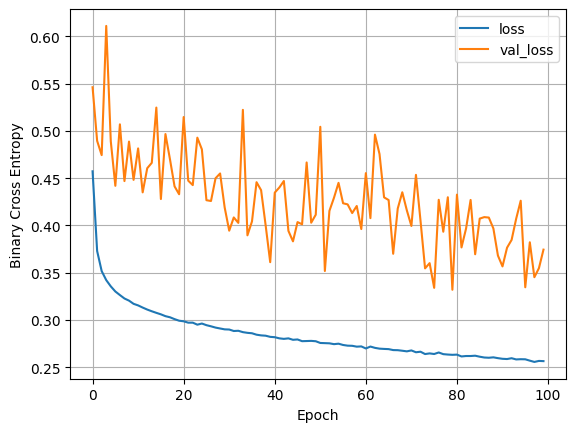

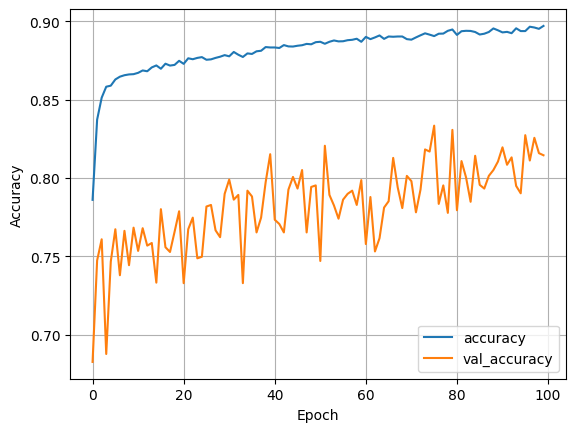

In [59]:
plot_loss(history)
plot_accuracy(history)

Linear Regression

In [61]:
import copy
from sklearn.linear_model import LinearRegression

In [62]:
df1 = pd.read_csv(r"C:\Users\gchau\OneDrive\Documents\Python_Exercises\Machine Learning for Everybody\SeoulBikeData.csv", encoding ='latin1')
data_columns = ["date", "bike_count", "Hour", "temp", "humidity", "wind", "visibility", "dew_temp", "radiation", "rain", "snow", "season", "holiday", "functional"]
df1.columns = data_columns

In [63]:
df1.head()

,date,bike_count,Hour,temp,humidity,wind,visibility,dew_temp,radiation,rain,snow,season,holiday,functional
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [64]:
df1 = df1.drop(['date', 'holiday', 'season'], axis=1)
df1.head()

,bike_count,Hour,temp,humidity,wind,visibility,dew_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [65]:
df1['functional'] = df1['functional'].map({'Yes':1, 'No':0})

In [66]:
df1.head(5)

,bike_count,Hour,temp,humidity,wind,visibility,dew_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [67]:
df1[df1['functional'] == 0]

,bike_count,Hour,temp,humidity,wind,visibility,dew_temp,radiation,rain,snow,functional
3144,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,0
3145,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,0
3146,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,0
3147,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,0
3148,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8251,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,0
8252,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,0
8253,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,0
8254,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,0


In [68]:
df1 = df1[df1['Hour'] == 12]
df1 = df1.drop(['Hour'],axis=1)

In [69]:
df1.head()

,bike_count,temp,humidity,wind,visibility,dew_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


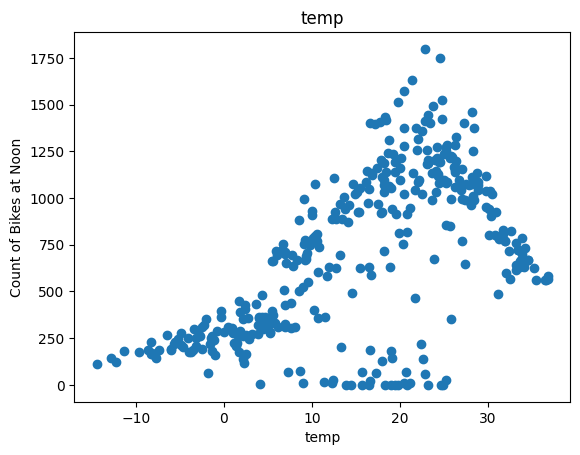

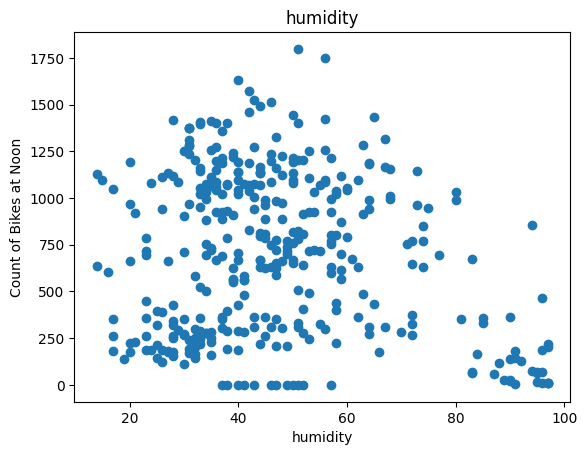

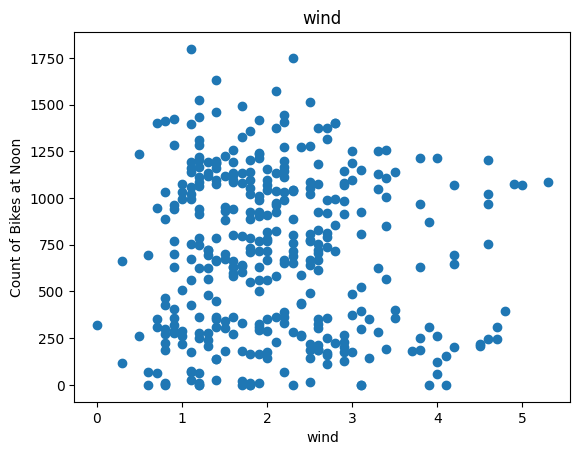

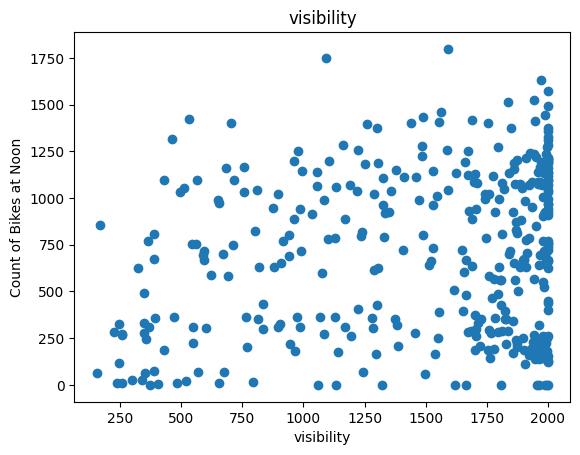

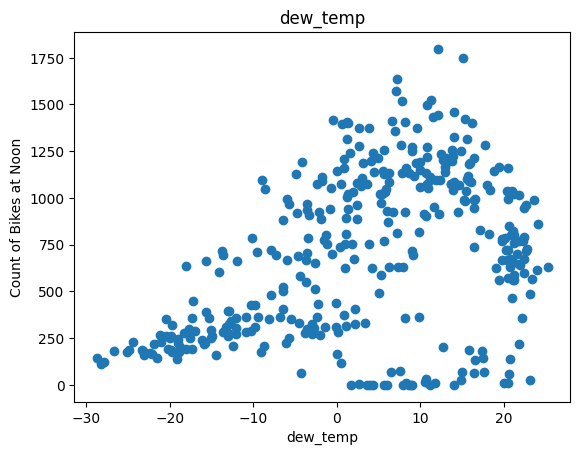

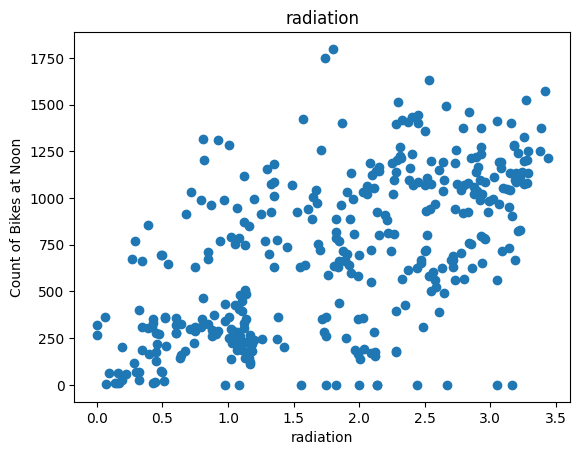

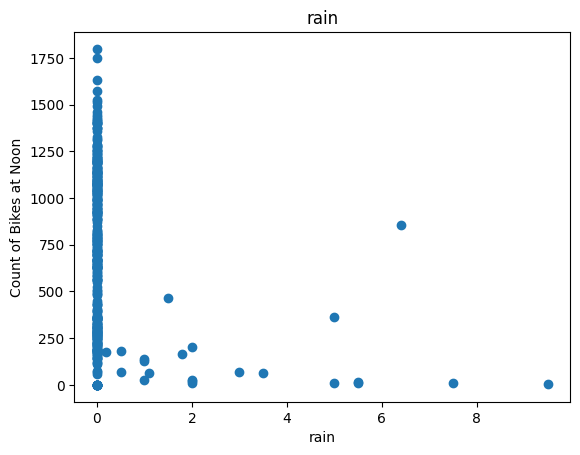

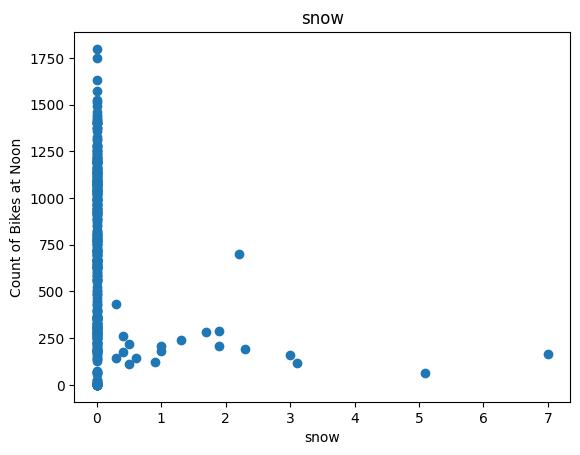

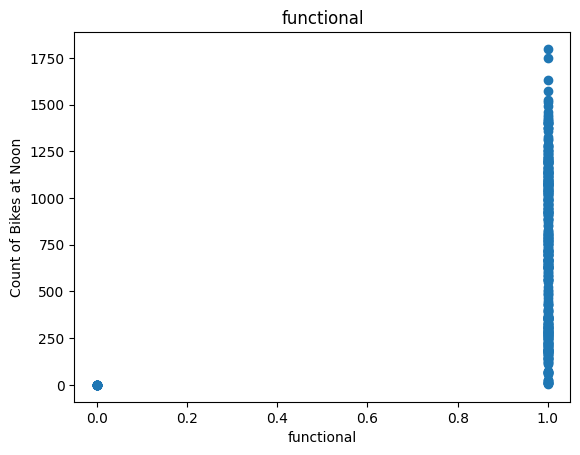

In [70]:
for label in df1.columns[1:]:
    plt.scatter(df1[label], df1["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Count of Bikes at Noon')
    plt.show()

In [71]:
df1 = df1.drop(['rain', 'visibility', 'functional', 'snow'], axis=1)

In [72]:
df1.head()

,bike_count,temp,humidity,wind,dew_temp,radiation
12,449,1.7,23,1.4,-17.2,1.11
36,479,4.3,41,1.3,-7.8,1.09
60,333,5.8,85,1.7,3.4,0.43
84,393,-0.3,38,4.8,-12.9,1.11
108,321,-2.3,25,0.0,-19.7,0.00


Training, Validation, Test

In [74]:
train, valid, test = np.split(df1.sample(frac=1, random_state=42), [int(0.6*len(df1)), int(0.8*len(df1))])

C:\Users\gchau\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [75]:
train

,bike_count,temp,humidity,wind,dew_temp,radiation
4644,1202,24.0,51,1.8,13.2,2.29
804,297,-3.4,32,3.1,-17.7,1.02
372,252,-4.1,28,3.8,-19.9,1.08
7428,130,18.0,92,2.9,16.6,0.45
1380,145,-7.7,32,2.5,-21.5,1.13
...,...,...,...,...,...,...
2580,751,9.8,46,1.2,-1.2,1.13
6948,989,23.7,64,1.9,16.4,0.79
5364,991,27.4,80,2.7,23.6,0.97
3204,1095,18.2,15,1.6,-8.9,2.27


In [76]:
valid

,bike_count,temp,humidity,wind,dew_temp,radiation
6396,355,25.8,81,3.2,22.2,0.80
1068,226,1.2,58,0.8,-6.1,0.74
8052,926,12.6,36,2.6,-2.1,2.14
1572,165,-8.3,32,1.8,-22.1,1.99
6540,768,27.0,74,2.5,21.9,0.94
...,...,...,...,...,...,...
8028,907,10.0,39,2.0,-3.3,2.20
7116,915,20.8,52,1.2,10.5,1.25
5196,996,27.0,68,1.1,20.5,1.20
6708,1041,26.9,60,2.3,18.4,1.67


In [77]:
test

,bike_count,temp,humidity,wind,dew_temp,radiation
5676,791,31.1,60,2.7,22.4,1.02
4980,10,20.5,97,1.8,20.0,0.15
5100,9,21.1,97,1.2,20.5,0.17
7980,737,10.8,49,2.7,0.4,1.45
6036,484,31.1,63,3.0,23.2,1.14
...,...,...,...,...,...,...
1716,248,2.9,53,4.7,-5.7,1.37
2556,933,10.0,38,1.5,-3.6,2.51
6492,25,25.2,89,1.4,23.2,0.32
8364,963,14.2,45,0.9,2.4,1.86


In [78]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            x = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((x,y))
    return data, x, y

In [79]:
_, x_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=["temp"])
_, x_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=["temp"])

x_train_temp

In [81]:
x_valid_temp

array([[25.8],
       [ 1.2],
       [12.6],
       [-8.3],
       [27. ],
       [ 4. ],
       [28.2],
       [ 1.6],
       [18.7],
       [-6.5],
       [-0.3],
       [ 4.3],
       [18.8],
       [18.9],
       [33.8],
       [22.2],
       [30.8],
       [24.1],
       [15.7],
       [17.2],
       [ 3.9],
       [28.9],
       [ 8.5],
       [25.2],
       [26.3],
       [28.4],
       [19.6],
       [-8.6],
       [ 7.6],
       [24.5],
       [29.8],
       [15.5],
       [-5.5],
       [ 5.5],
       [24.3],
       [33.2],
       [20.8],
       [-2.3],
       [33.9],
       [11.5],
       [ 9.2],
       [30.1],
       [18.3],
       [22.4],
       [21.8],
       [ 6.8],
       [30.5],
       [-1. ],
       [ 8.1],
       [ 0.9],
       [27.9],
       [25.8],
       [18.4],
       [-0.8],
       [24.3],
       [31.7],
       [29.8],
       [12.3],
       [19.8],
       [16.5],
       [-1.1],
       [12.5],
       [ 6.9],
       [ 2.4],
       [-6. ],
       [-2.5],
       [15

In [82]:
x_test_temp

array([[ 31.1],
       [ 20.5],
       [ 21.1],
       [ 10.8],
       [ 31.1],
       [  7.7],
       [  8.5],
       [ 22.6],
       [ 25.2],
       [ 20. ],
       [ -3.7],
       [ 25.7],
       [ 28.2],
       [ 30.3],
       [  9.4],
       [-11.3],
       [  4.3],
       [  4.3],
       [  4.7],
       [ 28.9],
       [ -2.9],
       [ 25.7],
       [  1.8],
       [  3.9],
       [ 33.9],
       [ 33.6],
       [ -4.9],
       [ 14.7],
       [  5.4],
       [ 27.8],
       [ 22.9],
       [  2.5],
       [  8.6],
       [ 21.4],
       [ 13.4],
       [ 18.8],
       [ 36.8],
       [-12.2],
       [  5.3],
       [ 22.1],
       [ 23.1],
       [  7.9],
       [ 27.3],
       [ 20.5],
       [ -3.5],
       [  2.5],
       [ 34.5],
       [ 33.4],
       [  4.5],
       [ 13.7],
       [ 19.8],
       [ 23.9],
       [ 23.2],
       [ 19. ],
       [ 13.9],
       [ 36.5],
       [ 16.6],
       [ 20.5],
       [ 20.5],
       [ 22.1],
       [  7.1],
       [  6.9],
       [

In [83]:
temp_reg= LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

x&y Intercepts

In [85]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.75179095]] [375.94689703]


In [86]:
temp_reg.score(x_test_temp, y_test_temp)

0.1724911525262579

The correlation between temp & bike_count is not that linear. Because the r-squarred value is close to 0.

Multiple Linear Regression

In [89]:
_, x_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df1.columns[1:])
_, x_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_labels=df1.columns[1:])
_, x_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df1.columns[1:])

In [90]:
mul_reg = LinearRegression()
mul_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [91]:
print(mul_reg.coef_, mul_reg.intercept_)

[[-16.81591725 -11.65048511 -27.59118479  35.26062042 146.70238518]] [1187.0474355]


In [92]:
mul_reg.score(x_test_all,y_test_all)

0.4549019857015858

The r-squared value has incresed now. Which means there is a good correlation between all the features and the bike count.

Root Mean Squared Error

In [95]:
y_pred=mul_reg.predict(x_test_all)

In [96]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [97]:
MSE(y_pred, y_test_all)

np.float64(106660.91659659038)

K-Means Clustering & Principal Component Analysis(PCA)

In [99]:
import seaborn as sns

In [100]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]

In [101]:
df2 = pd.read_csv(r"C:\Users\gchau\OneDrive\Documents\Python_Exercises\Machine Learning for Everybody\seeds_dataset.txt", names=cols, sep=r'\s+')

In [102]:
df2.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


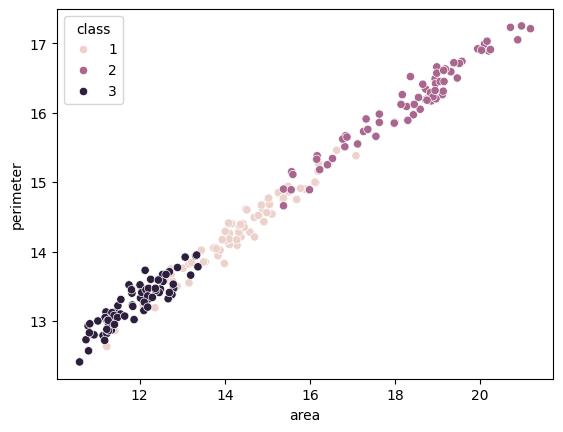

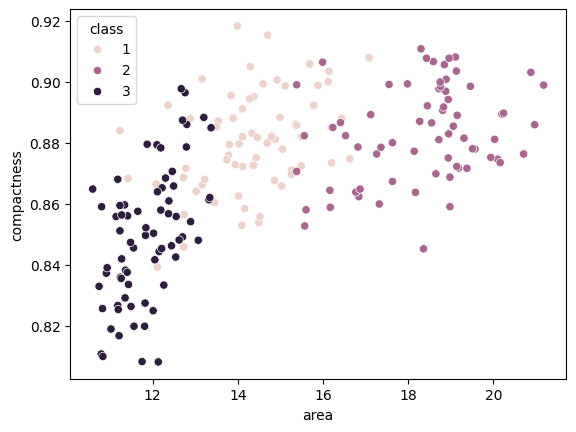

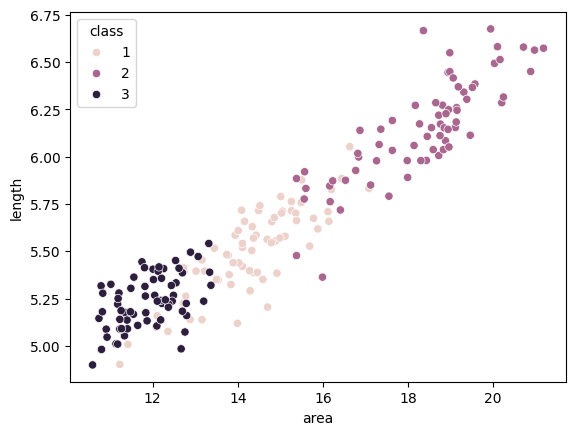

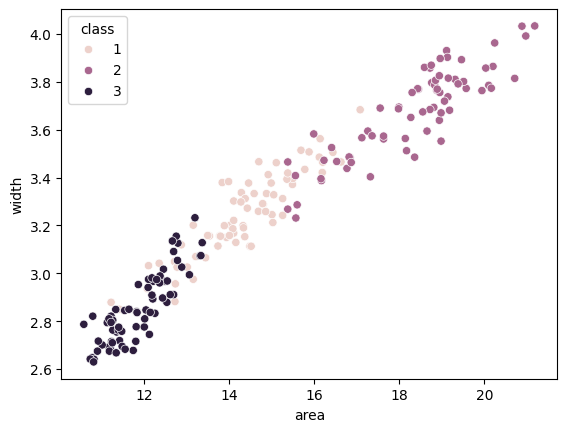

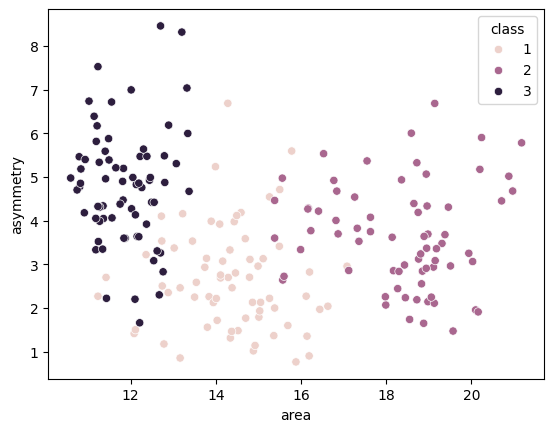

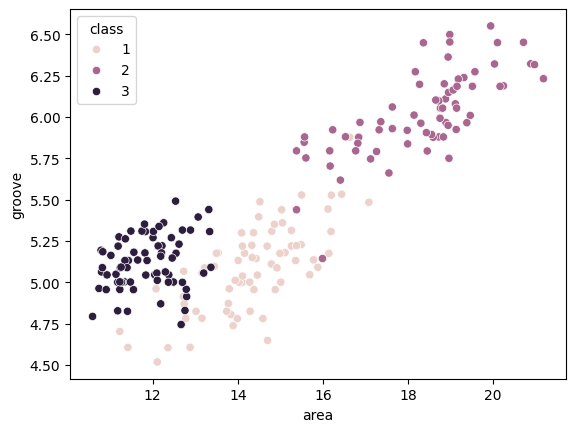

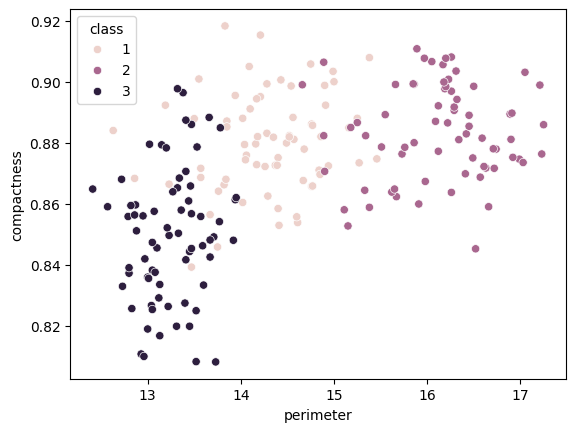

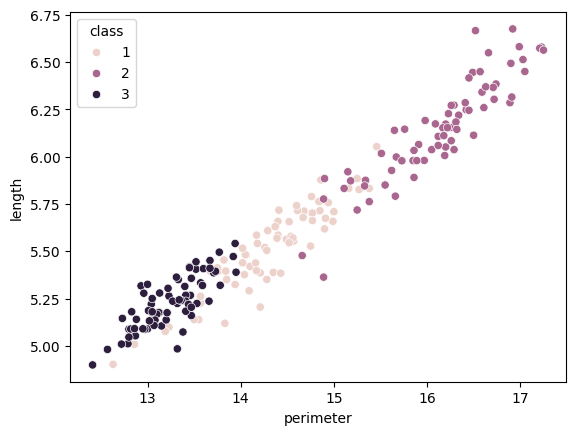

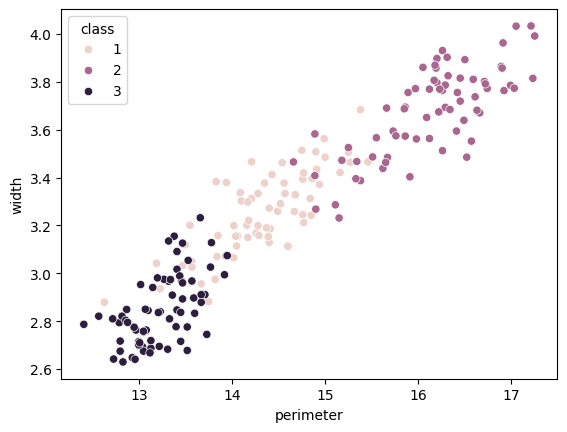

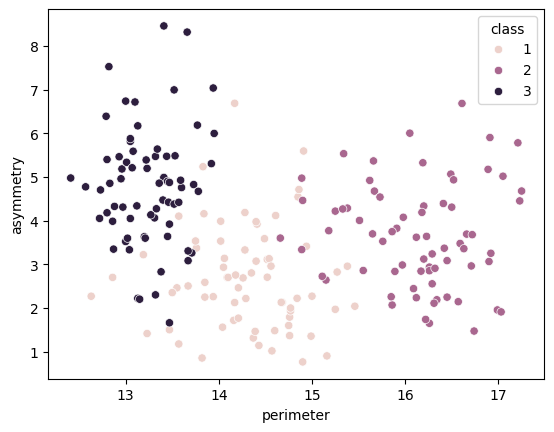

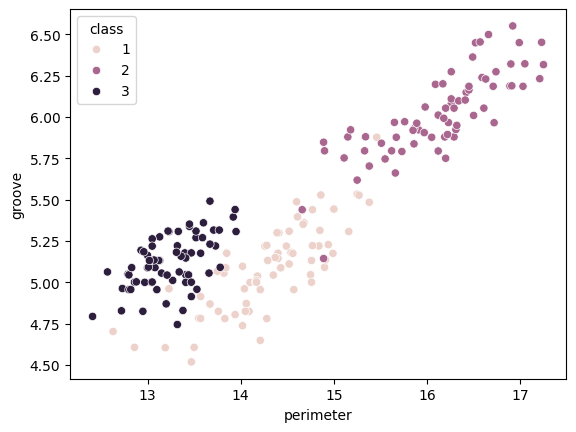

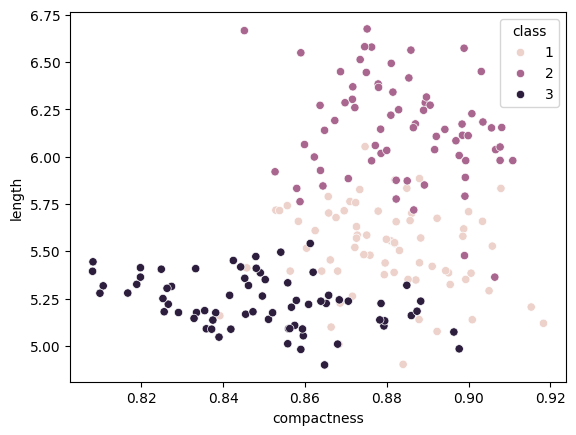

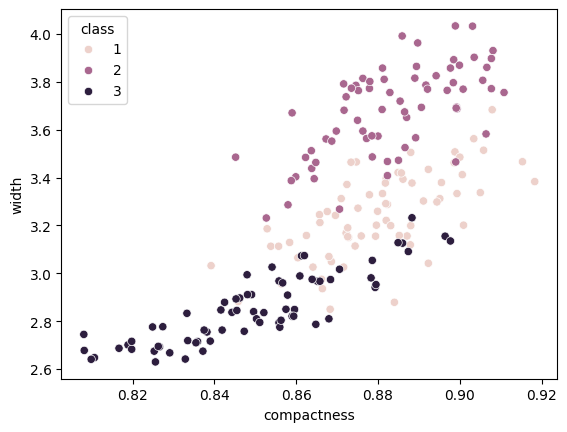

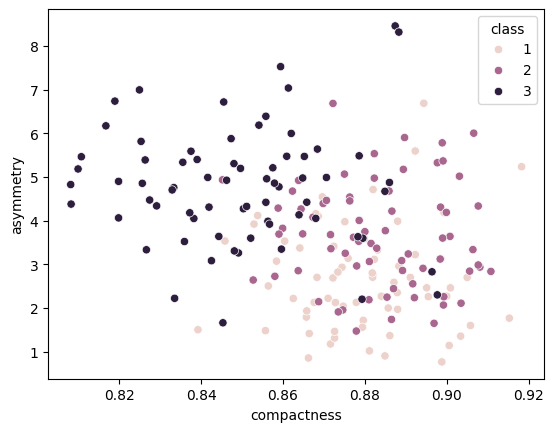

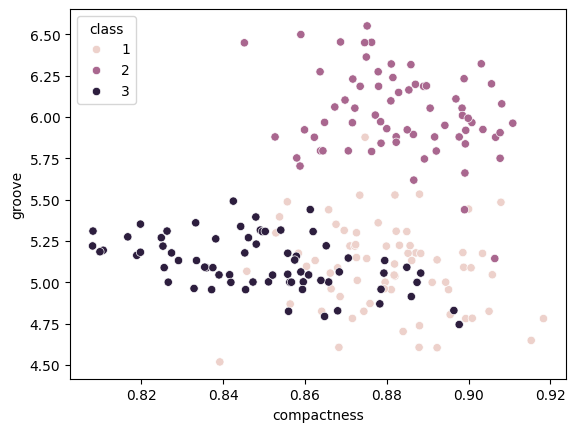

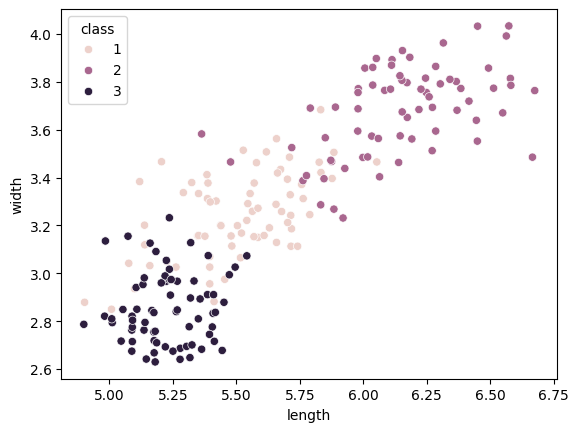

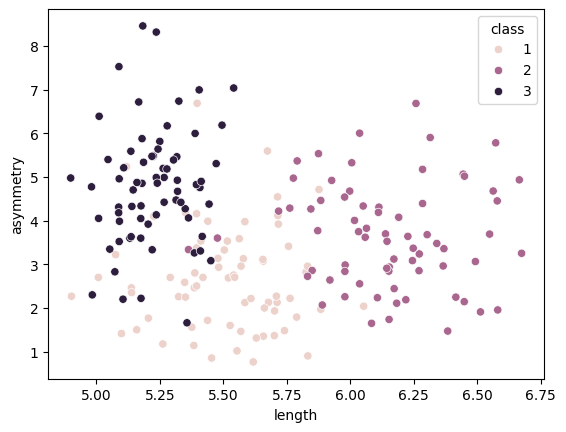

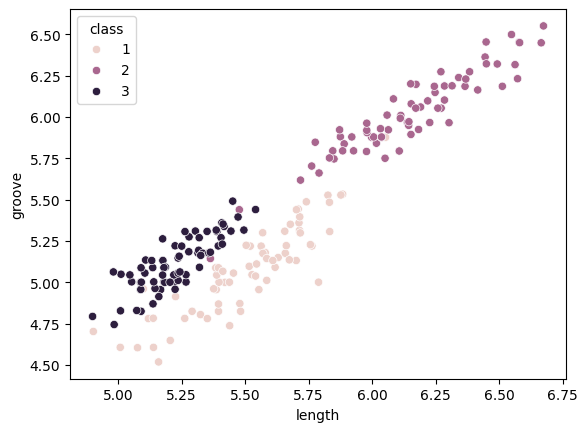

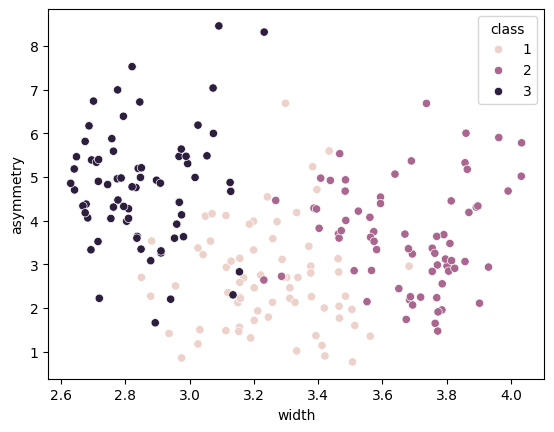

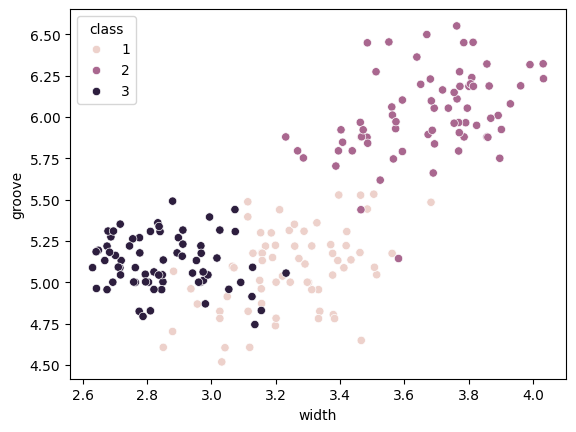

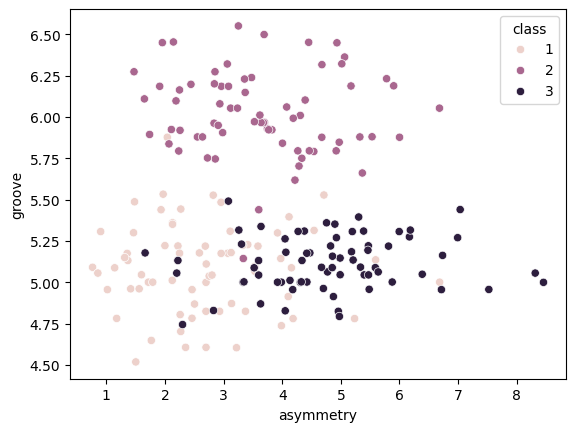

In [103]:
for i in range(len(cols[:-1])):
    for j in range(i+1,len(cols[:-1])):
        x_label=cols[i]
        y_label=cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df2, hue='class')
        plt.show()

In [193]:
from sklearn.cluster import KMeans

In [195]:
x = 'perimeter'
y = 'asymmetry'
X = df2[[x,y]].values

In [201]:
kmeans = KMeans(n_clusters=3).fit(X)

In [207]:
clusters = kmeans.labels_

In [209]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [215]:
df['class'].values

array([1, 1, 1, ..., 0, 0, 0])